# TP2 - DA SILVA PEREIRA Théo

# Exercice 1

In [1]:
import pandas as pd

df = pd.read_csv('Pistachio_16_Features_Dataset.csv', delimiter=';',
on_bad_lines='skip')
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio


<Axes: >

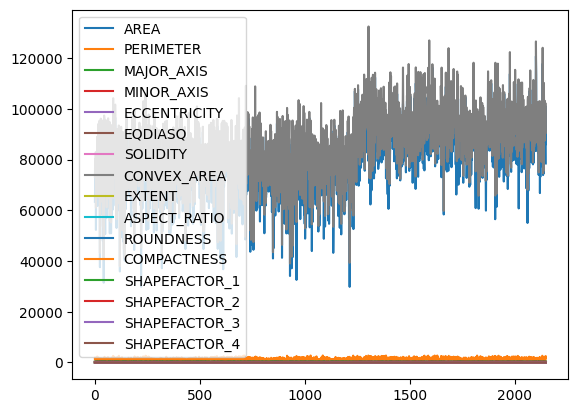

In [2]:
df.plot()

In [3]:
import matplotlib.pyplot as plt
df.dropna()
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()

x_normalized = scaler.fit_transform(x)
x_normalized

array([[-1.26229557,  0.3793384 , -1.72358958, ...,  2.01013092,
         0.30094511, -1.57903134],
       [-0.88367525,  1.3748213 , -1.09099947, ...,  1.12697256,
         0.08038137, -1.01949269],
       [-0.48493096, -0.47788077,  0.18848508, ..., -0.05057192,
        -0.82220928, -0.31138687],
       ...,
       [ 1.61489872, -0.45369561,  0.89300681, ..., -0.93373028,
         0.93447928,  0.83856153],
       [ 1.33080009, -0.61456785,  0.18291441, ..., -0.63934416,
         1.50387789,  0.84242042],
       [-0.11317108,  2.47933587, -0.01035424, ...,  0.83258644,
        -0.12610384, -1.70830406]])

# Exercice 2

## 1. Séparation des données

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

## 2. Test des algorithmes de classification

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Définition des modèles

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=3)

svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

### Entrainements et prédictions

In [7]:
knn_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_tree = decision_tree_model.predict(x_test)

print("\nPrédiction du modèle KNN (5 premières lignes) :")
print(y_pred_knn[:5])

print("\nPrédiction du modèle SVM (5 premières lignes) :")
print(y_pred_svm[:5])

print("\nPrédiction du modèle tree (5 premières lignes) :")
print(y_pred_tree[:5])


Prédiction du modèle KNN (5 premières lignes) :
['Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio']

Prédiction du modèle SVM (5 premières lignes) :
['Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio']

Prédiction du modèle tree (5 premières lignes) :
['Siit_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio']


### Evaluations

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy_knn = knn_model.score(x_test, y_test)
accuracy_svm = svm_model.score(x_test, y_test)
accuracy_tree = decision_tree_model.score(x_test, y_test)

precision_knn = precision_score(y_test, y_pred_knn, pos_label='Kirmizi_Pistachio')
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Kirmizi_Pistachio')
precision_tree = precision_score(y_test, y_pred_tree, pos_label='Kirmizi_Pistachio')

recall_knn = recall_score(y_test, y_pred_svm, pos_label='Kirmizi_Pistachio')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Kirmizi_Pistachio')
recall_tree = recall_score(y_test, y_pred_tree, pos_label='Kirmizi_Pistachio')

f1_knn = f1_score(y_test, y_pred_knn, pos_label='Kirmizi_Pistachio')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Kirmizi_Pistachio')
f1_tree = f1_score(y_test, y_pred_tree, pos_label='Kirmizi_Pistachio')

print(f"Exactitude (KNN) : {accuracy_knn:.2f}")
print(f"Exactitude (SVM) : {accuracy_svm:.2f}")
print(f"Exactitude (tree) : {accuracy_tree:.2f}")

print(f"\nPrécision (KNN) : {precision_knn:.2f}")
print(f"Précision (SVM) : {precision_svm:.2f}")
print(f"Précision (tree) : {precision_tree:.2f}")

print(f"\nRappel (KNN) : {recall_knn:.2f}")
print(f"Rappel (SVM) : {recall_svm:.2f}")
print(f"Rappel (tree) : {recall_tree:.2f}")

print(f"\nF-mesure (KNN) : {f1_knn:.2f}")
print(f"F-mesure (SVM) : {f1_svm:.2f}")
print(f"F-mesure (tree) : {f1_tree:.2f}")

Exactitude (KNN) : 0.71
Exactitude (SVM) : 0.76
Exactitude (tree) : 0.87

Précision (KNN) : 0.74
Précision (SVM) : 0.78
Précision (tree) : 0.89

Rappel (KNN) : 0.81
Rappel (SVM) : 0.81
Rappel (tree) : 0.89

F-mesure (KNN) : 0.75
F-mesure (SVM) : 0.79
F-mesure (tree) : 0.89


# Exercice 3

## 1. Afficache de l'arbre de décision

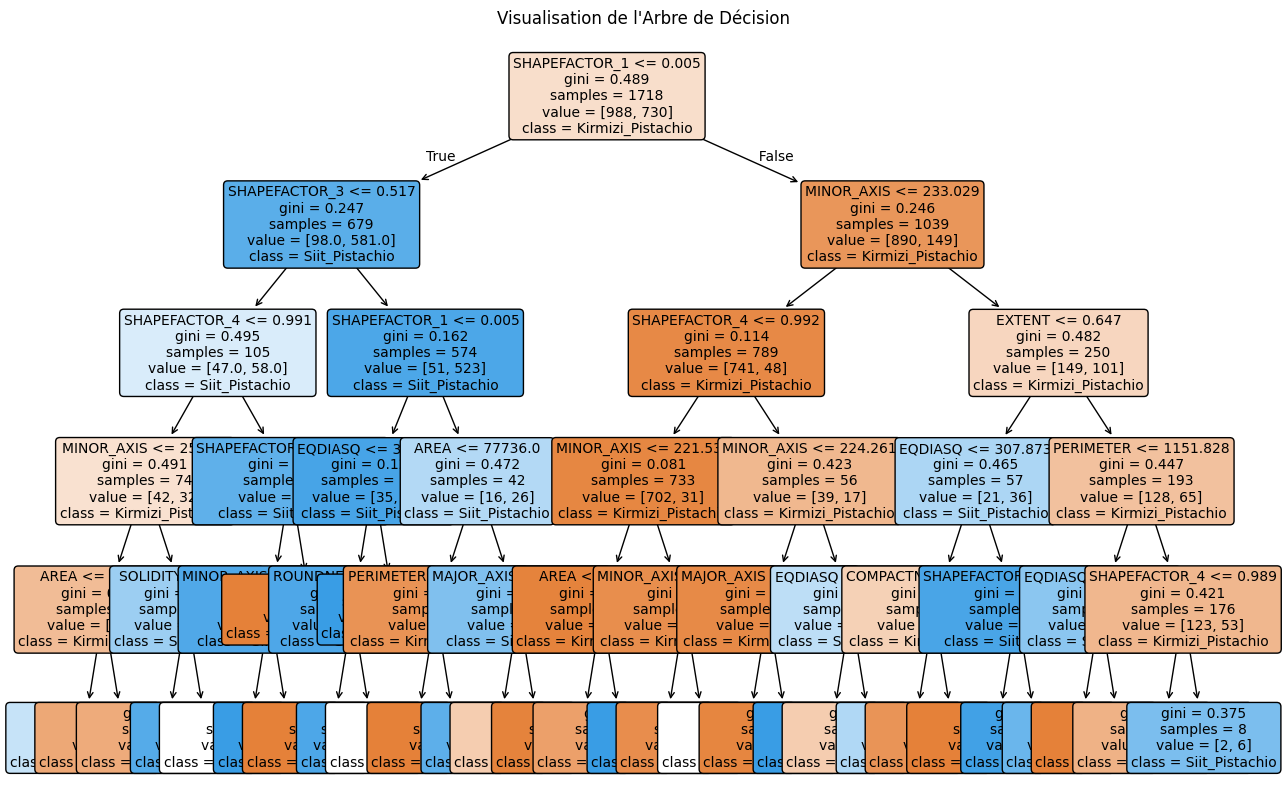

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model,
          feature_names=x.columns,
          class_names=decision_tree_model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

## 2. Impact du paramètre k

Lorsque l'on augmente k, l'exactitude augmente mais très légèrement. Elle augmente jusqu'à 0.77

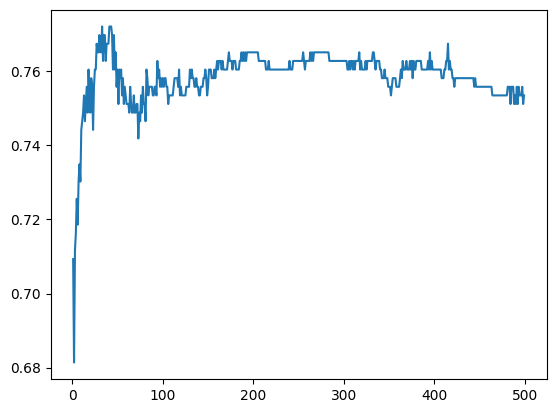

Accuracy max : 0.772093023255814


In [10]:
kList = []
accuracyList = []
for k in range(1, 500):
    kList.append(k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    accuracy_knn = knn_model.score(x_test, y_test)
    accuracyList.append(accuracy_knn)

plt.plot(kList, accuracyList)
plt.show() # Le graphique met un peu de temps à charger (~10s)
print(f"Accuracy max : {max(accuracyList)}")

Les paramètres des deux autres modèles sont C et max_depth

# Exercice 3 

## 1. Validation croisée

In [11]:
from sklearn.model_selection import cross_val_score



# Définir les modèles
knn_model = KNeighborsClassifier(n_neighbors=3)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Effectuer des validations croisées à 5 plis
cv_scores_knn = cross_val_score (knn_model, x, y, cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score (svm_model, x, y, cv=5, scoring='accuracy')
cv_scores_tree = cross_val_score (decision_tree_model, x, y, cv=5, scoring='accuracy')

# Afficher les scores de validation croisée
print("KNN : ")
print("Scores de validation croisée pour chaque pli :", cv_scores_knn)
print(f"Précision moyenne (validation croisée) : {cv_scores_knn.mean():.2f}")
print(f"Écart-type des scores: {cv_scores_knn.std():.2f}")

print("\nSVM : ")
print("Scores de validation croisée pour chaque pli :", cv_scores_svm)
print(f"Précision moyenne (validation croisée) : {cv_scores_svm.mean():.2f}")
print(f"Écart-type des scores: {cv_scores_svm.std():.2f}")

print("\ndecision_tree : ")
print("Scores de validation croisée pour chaque pli :", cv_scores_tree)
print(f"Précision moyenne (validation croisée) : {cv_scores_tree.mean():.2f}")
print(f"Écart-type des scores: {cv_scores_tree.std():.2f}")

KNN : 
Scores de validation croisée pour chaque pli : [0.74186047 0.75581395 0.76976744 0.72960373 0.76923077]
Précision moyenne (validation croisée) : 0.75
Écart-type des scores: 0.02

SVM : 
Scores de validation croisée pour chaque pli : [0.75581395 0.76976744 0.81162791 0.74125874 0.79020979]
Précision moyenne (validation croisée) : 0.77
Écart-type des scores: 0.02

decision_tree : 
Scores de validation croisée pour chaque pli : [0.86511628 0.86511628 0.84883721 0.83916084 0.85780886]
Précision moyenne (validation croisée) : 0.86
Écart-type des scores: 0.01


Les résultats sont différents de ceux de l'exercice 2. 

## 2. Matrice de confusion

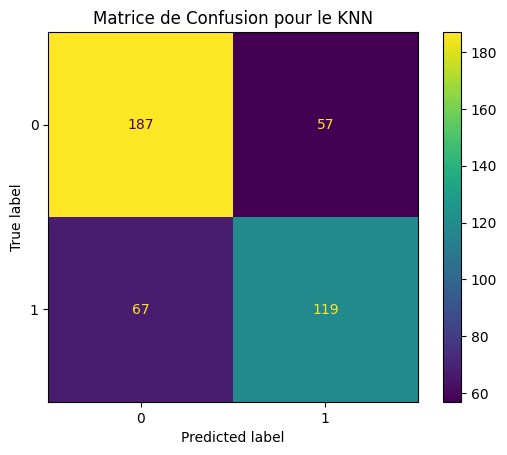

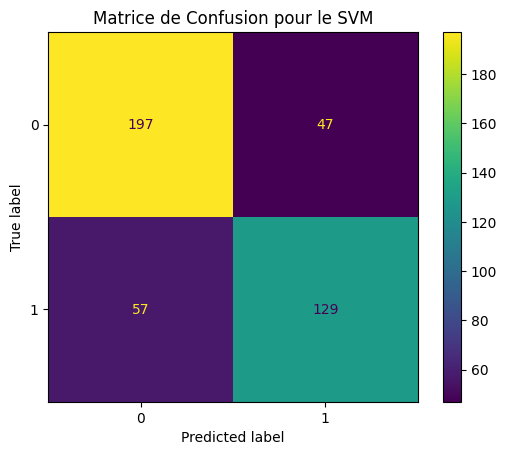

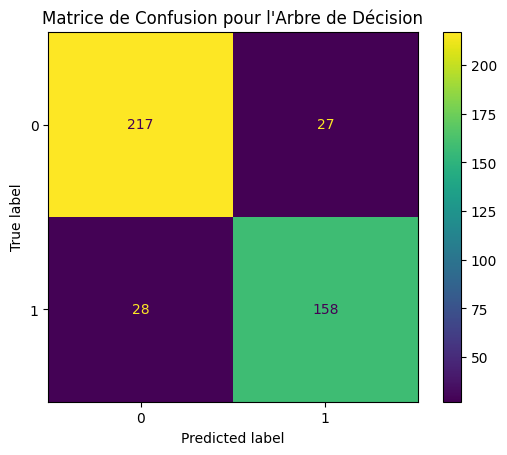

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer les matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Afficher les matrices de confusion
disp_knn = ConfusionMatrixDisplay (confusion_matrix=conf_matrix_knn)
disp_knn.plot(cmap='viridis')
plt.title("Matrice de Confusion pour le KNN")
plt.show()

disp_svm = ConfusionMatrixDisplay (confusion_matrix=conf_matrix_svm)
disp_svm.plot(cmap='viridis')
plt.title("Matrice de Confusion pour le SVM")
plt.show()

disp_tree = ConfusionMatrixDisplay (confusion_matrix=conf_matrix_tree)
disp_tree.plot(cmap='viridis')
plt.title("Matrice de Confusion pour l'Arbre de Décision")
plt.show()

# Exercice 4

## 1. Sélection de caractéristiques